# FIXED COUPON BOND EXAMPLE TREASURY

In [18]:
# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  
# See the license for more details.

This is a US Treasury bond analysis based on example in https://data.bloomberglp.com/bat/sites/3/2017/07/SF-2017_Paul-Fjeldsted.pdf

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from financepy.finutils import *
from financepy.products.bonds.FinBond import *

# Define the Bond

In [15]:
maturityDate = FinDate(15, 5, 2027)
coupon = 0.02375
freqType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
face = ONE_MILLION

In [16]:
bond = FinBond(maturityDate, coupon, freqType, accrualType, face)

In [17]:
cleanPrice = 99.780842  # if face is 1 then this must be 0.99780842

You can get information about the bond using the print method.

In [6]:
bond.print()

MATURITY DATE: SAT 15 MAY 2027
COUPON: 0.02375
FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: FinDayCountTypes.ACT_ACT_ICMA
FACE: 1000000


## Bond Cash Flows

We first need to set the settlement date of the bond. 

In [7]:
settlementDate = FinDate(21, 7, 2017)

In [8]:
bond.printFlows(settlementDate)

WED 15 NOV 2017 , 11875.0
TUE 15 MAY 2018 , 11875.0
THU 15 NOV 2018 , 11875.0
WED 15 MAY 2019 , 11875.0
FRI 15 NOV 2019 , 11875.0
FRI 15 MAY 2020 , 11875.0
SUN 15 NOV 2020 , 11875.0
SAT 15 MAY 2021 , 11875.0
MON 15 NOV 2021 , 11875.0
SUN 15 MAY 2022 , 11875.0
TUE 15 NOV 2022 , 11875.0
MON 15 MAY 2023 , 11875.0
WED 15 NOV 2023 , 11875.0
WED 15 MAY 2024 , 11875.0
FRI 15 NOV 2024 , 11875.0
THU 15 MAY 2025 , 11875.0
SAT 15 NOV 2025 , 11875.0
FRI 15 MAY 2026 , 11875.0
SUN 15 NOV 2026 , 11875.0
SAT 15 MAY 2027 , 1011875.0


The convention is to use these dates for yield calculations even if some fall on weekends.

## Bond Yield Measures

Current yield is the coupon over the price

In [9]:
bond.currentYield(cleanPrice)

0.02380216434734034

Yield to maturity using UK convention

In [10]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYieldConventions.UK_DMO)

0.02399999968488985

Yield to maturity using US Street convention

In [11]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYieldConventions.US_STREET)

0.02399999968488985

Yield to maturity using US Treasury convention

In [12]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYieldConventions.US_TREASURY)

0.02399810254873616

## Vectorizations

Some bond function such as yield to maturity support vectorisation

In [13]:
cleanPrices = np.linspace(70,150,20)

In [14]:
ylds = bond.yieldToMaturity(settlementDate, cleanPrices, FinYieldConventions.US_TREASURY)

Text(0, 0.5, 'Clean Prices')

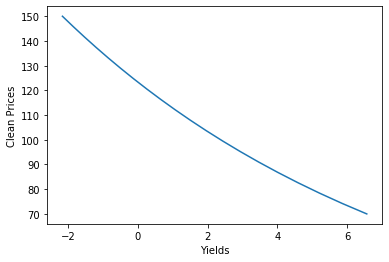

In [15]:
plt.plot(ylds*100.0, cleanPrices)
plt.xlabel("Yields")
plt.ylabel("Clean Prices")

In [16]:
cleanPrices = bond.cleanPriceFromYield(settlementDate, ylds, FinYieldConventions.US_TREASURY)

In [17]:
cleanPrices

array([ 70.        ,  74.21052632,  78.42105263,  82.63157895,
        86.84210526,  91.05263158,  95.26315789,  99.47368421,
       103.68421053, 107.89473684, 112.10526316, 116.31578947,
       120.52631579, 124.73684211, 128.94736842, 133.15789474,
       137.36842105, 141.57894737, 145.78947368, 150.        ])

And so we recover the initial input clean prices.

## Accrued Interest

For consistency let's fix the yield calculation convention to be US Treasury

In [18]:
yieldConvention = FinYieldConventions.US_TREASURY

In [19]:
ytm = bond.yieldToMaturity(settlementDate, cleanPrice, yieldConvention)

Full price is the clean price plus accrued interest

In [20]:
print("Full Price = ", bond.fullPriceFromYield(settlementDate, ytm, yieldConvention))

Full Price =  100.21324689131528


In [21]:
print("Clean Price = ", bond.cleanPriceFromYield(settlementDate, ytm, yieldConvention))

Clean Price =  99.78084200001094


Accrued interest is accrued from previous coupon date to settlement date

In [22]:
print("Previous coupon date is ", bond._pcd)

Previous coupon date is  MON 15 MAY 2017


In [23]:
print("Settlement date is ", settlementDate)

Settlement date is  FRI 21 JUL 2017


The amount of accrued interest is 

In [25]:
print("Accrued = ", bond._accruedInterest)

Accrued =  4324.048913043478


This is based on the following number of days of accrual

In [26]:
print("Accrued Days = ", bond._accruedDays)

Accrued Days =  67


In [27]:
print("Principal = ", bond.principal(settlementDate, ytm, yieldConvention))

Principal =  997808.4200001094


## Bond Risk Measures

The bond dollar duration is the actual derivative with respect to the yield. It is the bond price change for a 1bp drop in the yield-to-maturity divided by 1bp.

In [28]:
duration = bond.dollarDuration(settlementDate, ytm, yieldConvention)
print("Dollar Duration = ", duration)

Dollar Duration =  869.2156078895863


Modified Duration divides the dollar duration by the full price of the bond

In [29]:
modifiedDuration = bond.modifiedDuration(settlementDate, ytm, yieldConvention)
print("Modified Duration = ", modifiedDuration)

Modified Duration =  8.673659769075046


Macauley Duration multiplies the dollar duration by (1+y/f) and divides by the full price

In [30]:
macauleyDuration = bond.macauleyDuration(settlementDate, ytm, yieldConvention)
print("Macauley Duration = ", macauleyDuration)

Macauley Duration =  8.777735457380603


Convexity is the second derivative of the bond price with respect to the yield-to-maturity

In [31]:
conv = bond.convexityFromYield(settlementDate, ytm, yieldConvention)
print("Convexity = ", conv)

Convexity =  0.8513814656357104
